In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import numpy as np
from pycaret.regression import *

In [2]:
df = pd.read_csv("desafio_indicium_imdb.csv", index_col='Unnamed: 0')
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB


In [4]:
df.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [5]:
df['Released_Year'].unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [6]:
df[df['Released_Year'] == 'PG']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [7]:
df.loc[df.index == 966, "Released_Year"] = 1995
df[df.index == 966]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,1995,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [8]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(11)
memory usage: 124.9+ KB


In [9]:
df['Runtime'].unique()

array(['175 min', '152 min', '202 min', '96 min', '201 min', '154 min',
       '195 min', '148 min', '139 min', '178 min', '142 min', '161 min',
       '179 min', '136 min', '146 min', '124 min', '133 min', '160 min',
       '132 min', '153 min', '169 min', '130 min', '125 min', '189 min',
       '116 min', '127 min', '118 min', '121 min', '207 min', '122 min',
       '106 min', '112 min', '151 min', '150 min', '155 min', '119 min',
       '110 min', '88 min', '137 min', '89 min', '165 min', '109 min',
       '102 min', '87 min', '126 min', '147 min', '117 min', '181 min',
       '149 min', '105 min', '164 min', '170 min', '98 min', '101 min',
       '113 min', '134 min', '229 min', '115 min', '143 min', '95 min',
       '104 min', '123 min', '131 min', '108 min', '81 min', '99 min',
       '114 min', '129 min', '228 min', '128 min', '103 min', '107 min',
       '68 min', '138 min', '156 min', '167 min', '163 min', '186 min',
       '321 min', '135 min', '140 min', '180 min', '158 min'

In [10]:
df['Runtime'] = df['Runtime'].str.split(' ').str[0]

In [11]:
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(3), object(10)
memory usage: 124.9+ KB


In [12]:
df['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [13]:
mapa = {
    'U': 'G',
    'UA': 'PG',
    'U/A': 'PG',
    'A': 'R',
    'PG-13': 'PG-13',
    'PG': 'PG',
    'R': 'R',
    'G': 'G',
    'TV-14': 'PG-13',
    'TV-MA': 'R',
    'TV-PG': 'PG',
    '16': 'R',
    'Unrated': 'Unrated',
    'Passed': 'Approved',
    'GP': 'PG',
    'Approved': 'Approved'
}

df['Certificate_clean'] = df['Certificate'].map(mapa)


In [14]:
df['Certificate_clean'].unique()

array(['R', 'PG', 'G', 'PG-13', nan, 'Approved', 'Unrated'], dtype=object)

In [15]:
df['Certificate_clean'] = df['Certificate_clean'].fillna('Unknown')

In [16]:
df['Certificate_clean'].value_counts()

Certificate_clean
R           344
G           246
PG          218
Unknown     101
Approved     45
PG-13        44
Unrated       1
Name: count, dtype: int64

In [17]:
df['Certificate'] = df['Certificate_clean']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Series_Title       999 non-null    object 
 1   Released_Year      999 non-null    int64  
 2   Certificate        999 non-null    object 
 3   Runtime            999 non-null    int64  
 4   Genre              999 non-null    object 
 5   IMDB_Rating        999 non-null    float64
 6   Overview           999 non-null    object 
 7   Meta_score         842 non-null    float64
 8   Director           999 non-null    object 
 9   Star1              999 non-null    object 
 10  Star2              999 non-null    object 
 11  Star3              999 non-null    object 
 12  Star4              999 non-null    object 
 13  No_of_Votes        999 non-null    int64  
 14  Gross              830 non-null    object 
 15  Certificate_clean  999 non-null    object 
dtypes: float64(2), int64(3), object

In [19]:
df['Meta_score'].unique()

array([100.,  84.,  90.,  96.,  94.,  74.,  66.,  92.,  82.,  87.,  73.,
        83.,  nan,  79.,  91.,  61.,  59.,  65.,  85.,  98.,  89.,  88.,
        57.,  67.,  62.,  77.,  64.,  75.,  80.,  97.,  99.,  78.,  68.,
        81.,  95.,  76.,  69.,  55.,  70.,  58.,  86.,  71.,  63.,  93.,
        72.,  60.,  47.,  49.,  50.,  33.,  54.,  56.,  51.,  53.,  48.,
        44.,  45.,  40.,  52.,  28.,  36.,  46.,  30.,  41.])

In [20]:
imputer = KNNImputer(n_neighbors=5)
df[['Meta_score']] = imputer.fit_transform(df[['Meta_score']])
df['Meta_score'] = np.round(df['Meta_score']).astype(int)

In [21]:
df['Meta_score'].unique()

array([100,  84,  90,  96,  94,  74,  66,  92,  82,  87,  73,  83,  78,
        79,  91,  61,  59,  65,  85,  98,  89,  88,  57,  67,  62,  77,
        64,  75,  80,  97,  99,  68,  81,  95,  76,  69,  55,  70,  58,
        86,  71,  63,  93,  72,  60,  47,  49,  50,  33,  54,  56,  51,
        53,  48,  44,  45,  40,  52,  28,  36,  46,  30,  41])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Series_Title       999 non-null    object 
 1   Released_Year      999 non-null    int64  
 2   Certificate        999 non-null    object 
 3   Runtime            999 non-null    int64  
 4   Genre              999 non-null    object 
 5   IMDB_Rating        999 non-null    float64
 6   Overview           999 non-null    object 
 7   Meta_score         999 non-null    int32  
 8   Director           999 non-null    object 
 9   Star1              999 non-null    object 
 10  Star2              999 non-null    object 
 11  Star3              999 non-null    object 
 12  Star4              999 non-null    object 
 13  No_of_Votes        999 non-null    int64  
 14  Gross              830 non-null    object 
 15  Certificate_clean  999 non-null    object 
dtypes: float64(1), int32(1), int64(

In [23]:
df['Gross'].unique()

array(['134,966,411', '534,858,444', '57,300,000', '4,360,000',
       '377,845,905', '107,928,762', '96,898,818', '292,576,195',
       '37,030,102', '315,544,750', '330,252,182', '6,100,000',
       '342,551,365', '171,479,930', '46,836,394', '290,475,067',
       '112,000,000', nan, '53,367,844', '188,020,017', '7,563,397',
       '10,055,859', '216,540,909', '136,801,374', '57,598,247',
       '100,125,643', '130,742,922', '322,740,140', '269,061',
       '335,451,311', '13,092,000', '13,182,281', '53,089,891',
       '132,384,315', '32,572,577', '187,705,427', '6,719,864',
       '23,341,568', '19,501,238', '422,783,777', '204,843,350',
       '11,990,401', '210,609,762', '5,321,508', '32,000,000',
       '1,024,560', '163,245', '19,181', '1,661,096', '5,017,246',
       '12,391,761', '190,241,310', '858,373,000', '678,815,482',
       '209,726,015', '162,805,434', '448,139,099', '6,532,908',
       '1,223,869', '223,808,164', '11,286,112', '707,481', '25,544,867',
       '2,375,3

In [24]:
df['Gross'] = pd.to_numeric(df['Gross'].str.replace(',', ''), errors='coerce')

In [25]:
imputer = KNNImputer(n_neighbors=5)
df[['Gross']] = imputer.fit_transform(df[['Gross']])
df['Gross'] = np.round(df['Gross']).astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Series_Title       999 non-null    object 
 1   Released_Year      999 non-null    int64  
 2   Certificate        999 non-null    object 
 3   Runtime            999 non-null    int64  
 4   Genre              999 non-null    object 
 5   IMDB_Rating        999 non-null    float64
 6   Overview           999 non-null    object 
 7   Meta_score         999 non-null    int32  
 8   Director           999 non-null    object 
 9   Star1              999 non-null    object 
 10  Star2              999 non-null    object 
 11  Star3              999 non-null    object 
 12  Star4              999 non-null    object 
 13  No_of_Votes        999 non-null    int64  
 14  Gross              999 non-null    int32  
 15  Certificate_clean  999 non-null    object 
dtypes: float64(1), int32(2), int64(

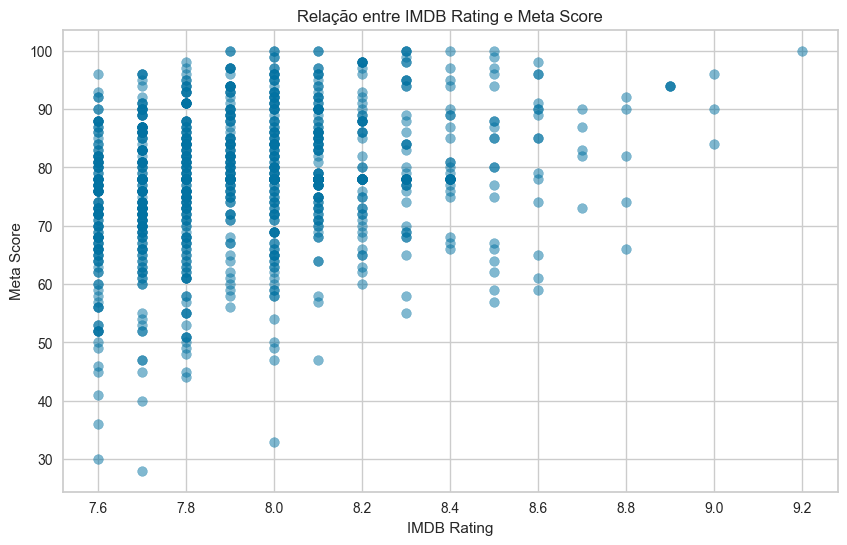

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df['IMDB_Rating'], df['Meta_score'], alpha=0.5)
plt.title('Relação entre IMDB Rating e Meta Score')
plt.xlabel('IMDB Rating')
plt.ylabel('Meta Score')
plt.grid(True)
plt.show()

# Hipótese 1: Filmes com alta classificação no IMDB também possuem um Meta Score alto.
# O gráfico de dispersão mostra que, apesar da correlação ser fraca, a maioria dos filmes de alta classificação também tem um Meta Score mais alto.

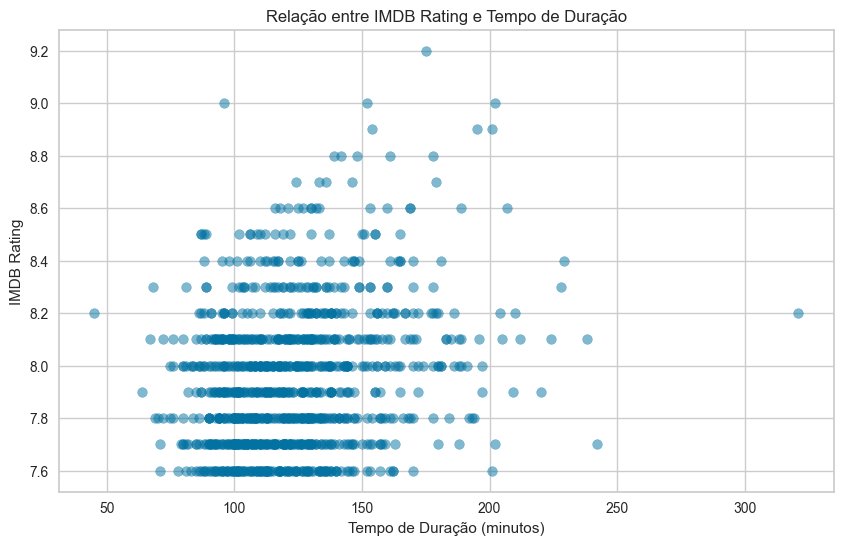

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Runtime'], df['IMDB_Rating'], alpha=0.5)
plt.title('Relação entre IMDB Rating e Tempo de Duração')
plt.xlabel('Tempo de Duração (minutos)')
plt.ylabel('IMDB Rating')
plt.grid(True)
plt.show()

# Hipótese 2: Filmes com maior duração tendem a ter um IMDB Rating mais alto.
# O gráfico de dispersão mostra uma tendência de que filmes mais longos, principalmente com duração acima de 120 minutos, tendem a ter notas mais altas no IMDB.

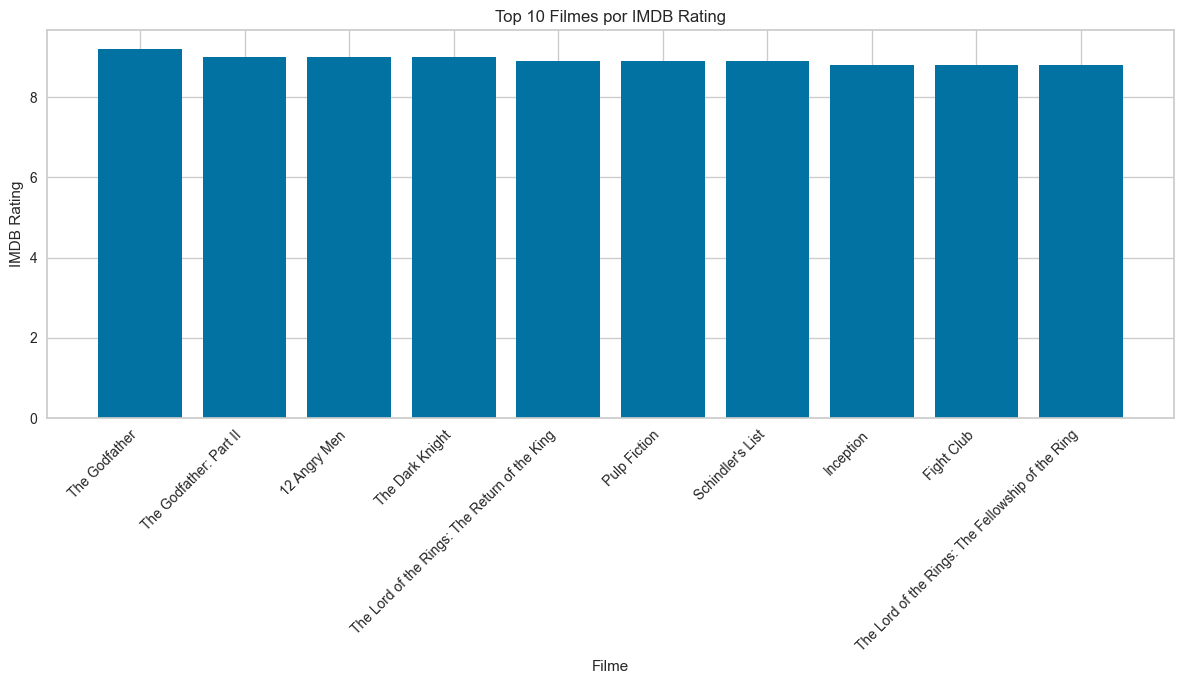

In [29]:
top_10_movies_by_rating = df.sort_values('IMDB_Rating', ascending=False).head(10)
plt.figure(figsize=(12, 7))
plt.bar(top_10_movies_by_rating['Series_Title'], top_10_movies_by_rating['IMDB_Rating'])
plt.title('Top 10 Filmes por IMDB Rating')
plt.xlabel('Filme')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 

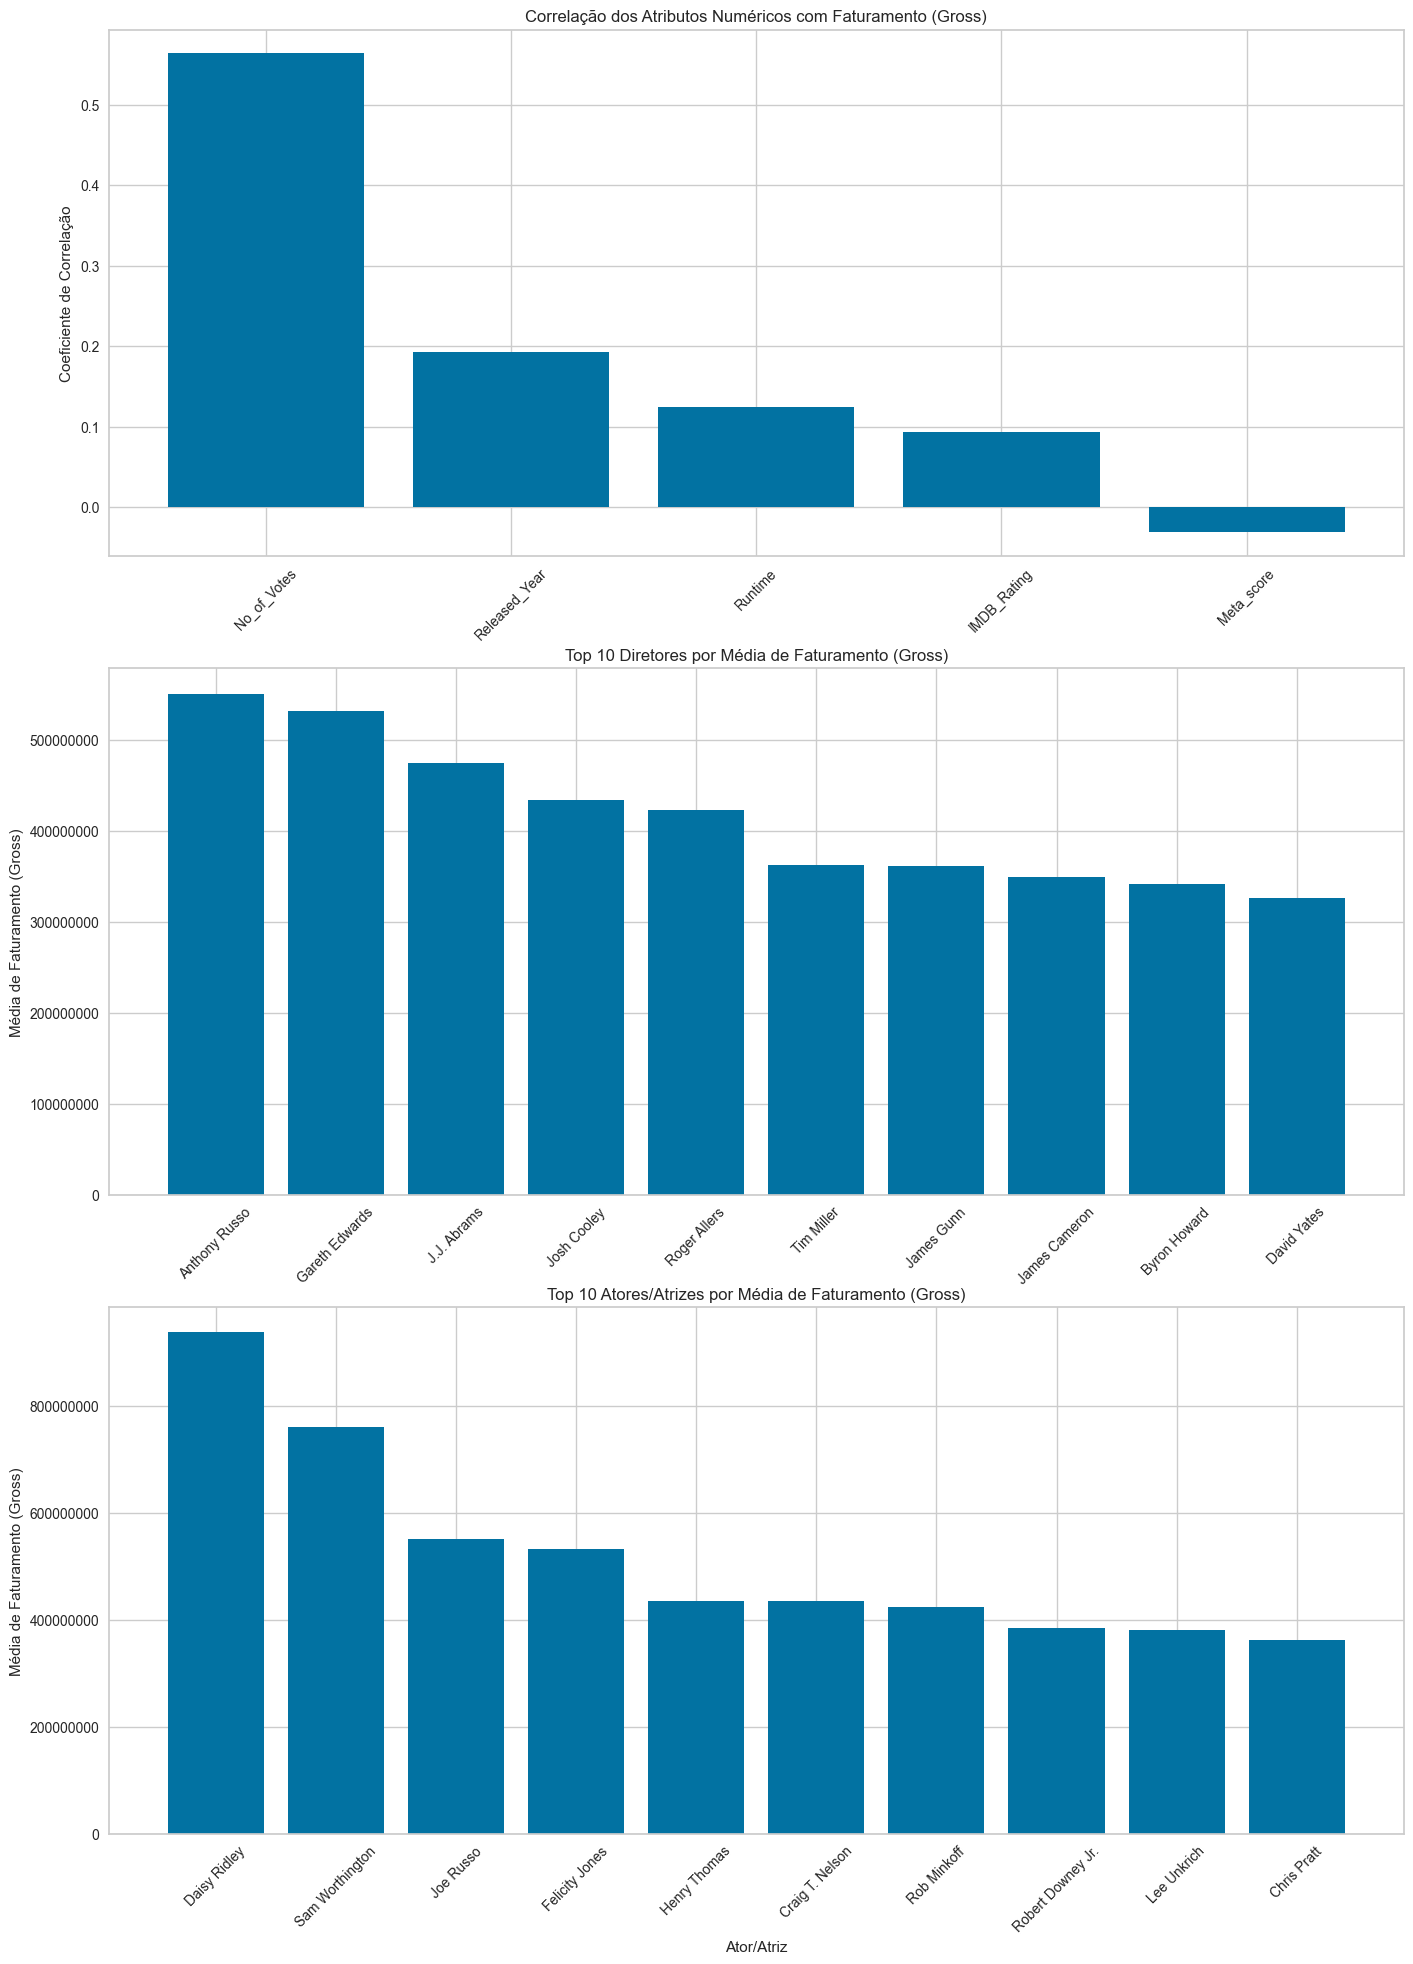

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))
plt.tight_layout(pad=5.0)

gross_corr = df.corr(numeric_only=True)['Gross'].sort_values(ascending=False).drop('Gross')
axes[0].bar(x=gross_corr.index, height=gross_corr.values)
axes[0].set_title('Correlação dos Atributos Numéricos com Faturamento (Gross)')
axes[0].set_ylabel('Coeficiente de Correlação')
axes[0].tick_params(axis='x', rotation=45)

top_directors_gross = df.groupby('Director')['Gross'].mean().sort_values(ascending=False).head(10)
axes[1].bar(x=top_directors_gross.index, height=top_directors_gross.values)
axes[1].set_title('Top 10 Diretores por Média de Faturamento (Gross)')
axes[1].set_ylabel('Média de Faturamento (Gross)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].ticklabel_format(style='plain', axis='y')

top_stars_gross = df.groupby('Star1')['Gross'].mean().sort_values(ascending=False).head(10)
axes[2].bar(x=top_stars_gross.index, height=top_stars_gross.values)
axes[2].set_title('Top 10 Atores/Atrizes por Média de Faturamento (Gross)')
axes[2].set_xlabel('Ator/Atriz')
axes[2].set_ylabel('Média de Faturamento (Gross)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].ticklabel_format(style='plain', axis='y')

plt.show()

In [31]:
s = setup(
    data=df,
    target='IMDB_Rating',
    session_id=123,
    ignore_features=['Series_Title', 'Overview', 'Star2', 'Star3', 'Star4']
)

,Description,Value
0,Session id,123
1,Target,IMDB_Rating
2,Target type,Regression
3,Original data shape,"(999, 16)"
4,Transformed data shape,"(999, 21)"
5,Transformed train set shape,"(699, 21)"
6,Transformed test set shape,"(300, 21)"
7,Ignore features,5
8,Numeric features,5
9,Categorical features,5


In [32]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.1717,0.0455,0.2128,0.3693,0.0236,0.0215,0.0870
en,Elastic Net,0.1760,0.0475,0.2171,0.3486,0.0241,0.0221,0.0950
lasso,Lasso Regression,0.1840,0.0512,0.2254,0.2981,0.0250,0.0230,0.0880
llar,Lasso Least Angle Regression,0.1840,0.0512,0.2254,0.2981,0.0250,0.0230,0.0700
omp,Orthogonal Matching Pursuit,0.1910,0.0546,0.2330,0.2502,0.0259,0.0239,0.0740
ada,AdaBoost Regressor,0.1880,0.0561,0.2357,0.2211,0.0261,0.0235,0.1430
gbr,Gradient Boosting Regressor,0.1932,0.0583,0.2406,0.1931,0.0266,0.0242,0.2070
lightgbm,Light Gradient Boosting Machine,0.1914,0.0584,0.2408,0.1876,0.0266,0.0240,0.6320
br,Bayesian Ridge,0.1945,0.0592,0.2422,0.1747,0.0268,0.0244,0.0700
lr,Linear Regression,0.1951,0.0596,0.2430,0.1688,0.0269,0.0244,1.0290


In [33]:
final_model = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1514,0.0325,0.1801,0.4714,0.0201,0.0190
1,0.1777,0.0436,0.2087,0.3573,0.0233,0.0223
2,0.1834,0.0510,0.2258,0.5430,0.0248,0.0228
3,0.1638,0.0417,0.2043,0.3882,0.0228,0.0206
4,0.1599,0.0379,0.1948,0.4961,0.0217,0.0202
5,0.1810,0.0563,0.2372,0.3355,0.0261,0.0225
6,0.1793,0.0492,0.2219,0.0194,0.0249,0.0228
7,0.1719,0.0470,0.2167,0.3101,0.0243,0.0217
8,0.1773,0.0493,0.2221,0.3536,0.0244,0.0220


In [35]:
novo_filme = pd.DataFrame(
    [{
        'Series_Title': 'The Shawshank Redemption',
        'Released_Year': 1994,
        'Certificate': 'R',
        'Certificate_clean': 'R',
        'Runtime': 142,
        'Genre': 'Drama',
        'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
        'Meta_score': 80.0,
        'Director': 'Frank Darabont',
        'Star1': 'Tim Robbins',
        'Star2': 'Morgan Freeman',
        'Star3': 'Bob Gunton',
        'Star4': 'William Sadler',
        'No_of_Votes': 2343110,
        'Gross': 28341469
    }]
)

if 'IMDB_Rating' in novo_filme.columns:
    novo_filme.drop('IMDB_Rating', axis=1, inplace=True)

prediction = predict_model(final_model, data=novo_filme)
predicted_score = prediction['prediction_label'].iloc[0]

print(f"\nA nota do IMDB prevista para 'The Shawshank Redemption' é: {predicted_score:.2f}")

save_model(final_model, 'modelo_previsao_imdb')
print("\nModelo salvo com sucesso no arquivo 'modelo_previsao_imdb.pkl'")


A nota do IMDB prevista para 'The Shawshank Redemption' é: 9.04
Transformation Pipeline and Model Successfully Saved

Modelo salvo com sucesso no arquivo 'modelo_previsao_imdb.pkl'


# Análise Exploratória e Modelagem

## 1. Relações observadas
- Os dados mostram uma **relação próxima entre a avaliação do público e a da crítica**, indicando que filmes bem avaliados em um, tendem a ser bem avaliados no outro.  
- Há uma **relação fraca entre a duração e a avaliação**. Filmes mais longos tendem a ter notas mais altas, o que pode indicar que filmes mais complexos são mais bem aceitos.

---

## 2. Questões propostas

### (a) Filme recomendado
Eu recomendaria **The Godfather**.  
É uma boa escolha, por possuir a **nota mais alta no IMDB (9.2)** e um **faturamento bruto muito alto**, significando que é um filme bem aceito pela crítica e também um grande sucesso de público.

### (b) Fatores relacionados ao faturamento
Os principais fatores são:

- **Popularidade (No_of_Votes):** A correlação com o faturamento é a mais forte de todas as variáveis numéricas. Um filme com um grande número de votos é um forte indicador de sucesso.  
- **Diretor e Atores:** O faturamento também está muito relacionado com o diretor e os atores. Diretores como *Christopher Nolan* e *Quentin Tarantino*, e atores como *Harrison Ford* e *Mark Hamill*, têm uma alta média de faturamento por filme.

### (c) Insights da coluna *Overview*
- É possível **extrair temas e sentimentos** da sinopse.  
- Também é possível **descobrir o gênero do filme a partir da coluna Overview** usando um modelo de classificação de texto.

---

## 3. Modelagem
- É um problema de **regressão**, pois prevemos um valor numérico contínuo.  
- Utilizamos **variáveis numéricas e categóricas**, com o **PyCaret** transformando-as automaticamente.  
- O PyCaret identifica o melhor modelo, e a performance é avaliada pelo **Erro Médio Absoluto (MAE)**, por ser a métrica mais clara para esse contexto.
